In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile
import os

In [2]:
# Check TensorFlow version
tf.__version__

'2.19.0'

In [3]:
# 📦 Download and extract the dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=dataset_url, extract=False)

# 📂 Extract the zip file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))
    print('✅ The dataset has been extracted.')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ The dataset has been extracted.


In [4]:
# Display dataset path and contents
print(os.path.dirname(zip_path))
print("Dataset folders: ")
!ls /root/.keras/datasets/cats_and_dogs_filtered/

/root/.keras/datasets
Dataset folders: 
train  validation  vectorize.py


In [5]:
# Define dataset paths
base_path = os.path.join(os.path.dirname(zip_path), "cats_and_dogs_filtered")

# Paths to training and validation folders
train_path = os.path.join(base_path, 'train')
val_path = os.path.join(base_path, 'validation')

In [6]:
# 🔁 Preprocess and augment training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [7]:
# 🔎 Preprocess validation data
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [8]:
# Build the Convolutional Neural Network (CNN)
# Initializing the CNN
cnn = tf.keras.models.Sequential()
# 1st Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224, 224, 3]))
# 1st pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# 2nd Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# 2nd pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Flattening layer
cnn.add(tf.keras.layers.Flatten())
# Full Connection layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,954,337 (45.60 MB)

 Trainable params: 11,954,337 (45.60 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the CNN
cnn.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy']
)

In [10]:
# Train the CNN
cnn.fit(x=training_set,
        validation_data=test_set,
        epochs=25
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5466 - loss: 1.3194 - val_accuracy: 0.6220 - val_loss: 0.6495
Epoch 2/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.6359 - loss: 0.6403 - val_accuracy: 0.6400 - val_loss: 0.6294
Epoch 3/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.6605 - loss: 0.6124 - val_accuracy: 0.6530 - val_loss: 0.6240
Epoch 4/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6981 - loss: 0.5942 - val_accuracy: 0.6880 - val_loss: 0.6032
Epoch 5/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7413 - loss: 0.5507 - val_accuracy: 0.6970 - val_loss: 0.5951
Epoch 6/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.7070 - loss: 0.5583 - val_accuracy: 0.7240 - val_loss: 0.5629
Epoch 7/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7530 - loss: 0.5092 - val_accuracy: 0.6640 - val_loss: 0.6091
Epoch 8/25
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7422 - loss: 0.5296 - val_accuracy: 0.7280 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
{'cats': 0, 'dogs': 1}
dog


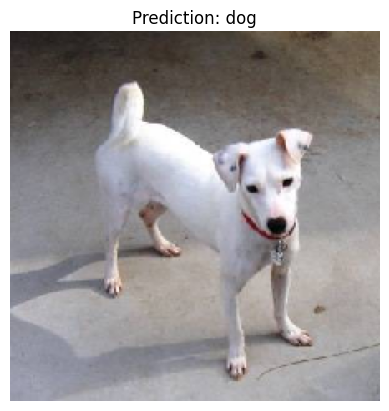

In [11]:
# Make a prediction on a new image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
test_image = image.load_img('/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2489.jpg', target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predict
result = cnn.predict(test_image)

# Check class indices
print(training_set.class_indices)

# Decide the prediction
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# Print result
print(prediction)

# 🖼️ Display the image
plt.imshow(test_image[0].astype('uint8'))
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()